# Develope a Model to predict the Loan Defaults

My task here is to predict the probability of default for new loan applications with a reasonable degree of accuracy based on the given data of loan application of Bank XYZ over a period of time. Inorder to achieve that, I need to train my ML algorithm on given dataset and train a model based on mapping of input features and target output, which in my case is 

(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
0 - all other cases).

One thing needs to be clear before I proceed ahead is that my problem statement is a Classification problem, where given training sample I will tune my model to test on unknown samples.

I will be breaking the entire working into following stages:

1] Read Dataset

2] Check Balanced or Imbalanced data (based on target labels)

3] Treat the Imbalanced Data (Doing Re-Sampeling)

4] Data Exploration, Pre-Processing and Feature Engineering:
    
    For Example:
     4.1] Repair my dataset for any breakdowns or missing values in dataset
     4.2] Drop some invalid features or features with incomplete information
     4.3] Convert categorical features to numeric etc.

5] Spliting the new processed data in to Train-Test data

6] Decide on the Machine Learning algos for processing our Model

    6.1] Training the models
    6.2] Testing/Validating the models
    6.3] Evaluating the models

7] Plotting the Evaluation Metric of different ML algos

Lets start by importing packages and libraries for graph display, I use %inline to show graph in same notebook window

## Imports

In [1]:
# Do necessary imports here or later as required

import os
import glob
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing,metrics 


import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

## Read Dataset

In [2]:
df = pd.read_csv('Loan_Application_Data.csv')

df.set_index('SK_ID_CURR')


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100023,0,Cash loans,F,N,Y,1,90000.0,544491.0,17563.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
# To know the information of the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76657 entries, 0 to 76656
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(43), object(16)
memory usage: 71.4+ MB
None


#### It can be seen that the total records are 76,657 and there are total 122 features (16 categorical features and 106 numerical features)

Let's see how the target variables distribution is available in this data. I will use seaborn package's countplot to plot the distribution.

C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


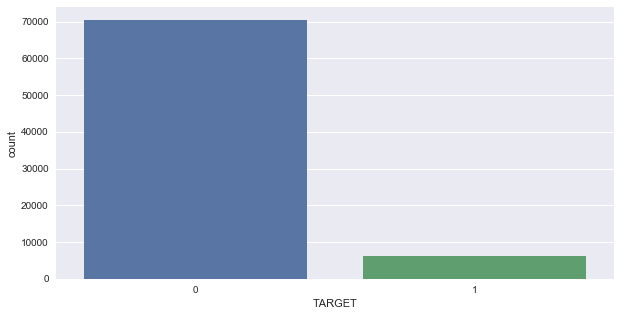

In [4]:
# set seaborn graph size
sns.set(rc={'figure.figsize':(10,5)})

#plot the graph
sns.countplot(x='TARGET',data=df)

<b> Observation: 

Here, it can be observed that the Target Variable distribution is very much skewed towards one class. Hence, there is imbalanced data.

## Treating the Imbalanced Data

I will follow the Data Level Approach to treat the Imbalanced Data by using Re-Sampeling technique (Random Under-Sampeling)

<b> Random Under-Sampeling - It aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out. </b> [1]

- So here I will sample random data from Target label 0 (all other cases) to balance with target label 1 (client with payment difficulties) data

In [5]:
# get all data with target label 0 ( all other cases)
target_label0 = df[df.TARGET==0]
target_label0.shape

(70435, 122)

In [6]:
# get all data with target label 1 (client with payment difficulties)

target_label1 = df[df.TARGET==1]
target_label1.shape

(6222, 122)

In [7]:
# Perform Random Sampeling on target label 0 data. I am taking 0.1 % as data sampeling rate. 

sampled_target_label0 = target_label0.sample(frac=0.1,random_state=2)
sampled_target_label0.shape


(7044, 122)

In [8]:
# create a balanced dataframe by combining both the above data

balanced_data = target_label1.append(sampled_target_label0,ignore_index=True)
balanced_data.shape

(13266, 122)

<b> Plotting the Target Variables for balanced_data. This distribution is appropriate for carrying predictions on prediction models

C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


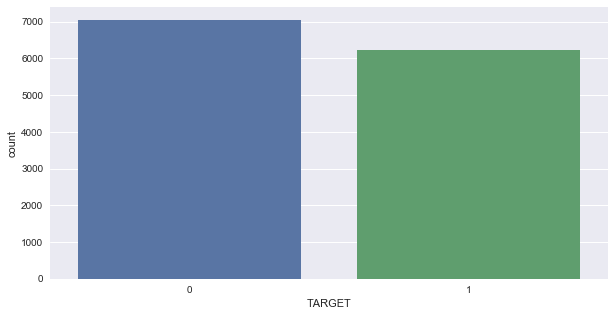

In [9]:

sns.countplot(x='TARGET',data=balanced_data)

## Data Exploration, Pre-processing and Feature Engineering

Now that I have got the balanced_data with proper distribution of Target Variables. The further task is to do some data exploration by using the data dictionary provided, also do some pre-processing of the data where required and some feature engineering to see which column contributes or which not contributes in achieving the target variable.

I have gone through some of the following steps:

    - Find the statiscal significance of the data and understanding them.
    - Imputing the missing values with mean/median of the column values for numerical columns and imputing with mode values for categorical columns.
    - Dropping the missing value columns, if these values are more than some threshold ( you can set any specific threshold value that you want)
    - Replacing some missing values with a valid new values for some important columns, which you think should not be dropped
    - Deriving a new column from the existing columns which can help in finding some necessary feature that can be informative.
    - Dropping the column that have single value in the column.
    - Doing some Data Transformation i.e Feature Selection or Dimentionality Reduction using PCA.
    - Remove some unwanted columns which do not specify a proper meaning to the data.
    - Convert the Categorical Values to Numerical Values
    - Perform Normalization etc



<b> Let's first describe our data using pandas describe() function. This gives the general statistics of the data that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [10]:
if(balanced_data.select_dtypes(include=[np.number]).shape[1] > 0):
    display(balanced_data.select_dtypes(include=[np.number]).describe())
if(balanced_data.select_dtypes(include=[np.object]).shape[1] > 0):
    display(balanced_data.select_dtypes(include=[np.object]).describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,13266.000000,13266.000000,13266.000000,1.326600e+04,1.326600e+04,13265.000000,1.326100e+04,13266.000000,13266.000000,13266.000000,...,13266.000000,13266.000000,13266.000000,13266.000000,11306.000000,11306.000000,11306.000000,11306.000000,11306.000000,11306.000000
mean,277804.564827,0.469019,0.443992,1.666396e+05,5.862271e+05,26953.984998,5.219479e+05,0.020239,-15578.053596,53329.667044,...,0.006558,0.000754,0.000226,0.000452,0.007872,0.007607,0.032372,0.249779,0.262073,1.972316
std,103101.051798,0.499058,0.744619,1.000949e+05,3.788134e+05,13693.712029,3.454634e+05,0.013020,4332.088715,131517.796952,...,0.080719,0.027446,0.015037,0.021263,0.092295,0.104454,0.192783,0.842724,0.615621,1.905423
min,100011.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2605.500000,4.500000e+04,0.000533,-25113.000000,-16103.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189637.250000,0.000000,0.000000,1.125000e+05,2.790000e+05,17064.000000,2.385000e+05,0.010006,-19112.000000,-2480.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276849.000000,0.000000,0.000000,1.440000e+05,5.084955e+05,25033.500000,4.500000e+05,0.018801,-15159.500000,-1122.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367233.750000,1.000000,1.000000,2.025000e+05,7.908300e+05,34308.000000,6.750000e+05,0.026392,-11926.750000,-348.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456242.000000,1.000000,9.000000,3.150000e+06,2.931660e+06,230161.500000,2.700000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,16.000000,8.000000,16.000000


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,13266,13266,13266,13266,13220,13266,13266,13266,13266,9486,13266,13266,3933,6258,6177,6609
unique,2,2,2,2,7,5,5,5,6,18,7,57,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
freq,12181,8217,8885,9103,10805,7398,9791,8226,11623,2706,2407,3109,3018,6140,2719,6506


In [11]:
balanced_data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      1
AMT_GOODS_PRICE                  5
NAME_TYPE_SUITE                 46
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                   8885
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE     

It is understood that I can remove the SK_ID_CURR feature because it is the Loan ID in the loan book, and it does not tell anything, that results in target.

In [12]:
balanced_data = balanced_data.drop('SK_ID_CURR',axis=1)

I am considering a threshold = 100 for treating the NaN values with mean/mode of that column. If any column is having NaN values <=100, and if the dtype is numerical then I will get the mean value of that column and fill the NaN values with the same else if it is categorical column then I will get the mode(replace with highest frequency value) of that column


In [13]:
num_cols= ['AMT_ANNUITY','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
categ_col=['NAME_TYPE_SUITE']

balanced_data[num_cols]=balanced_data[num_cols].fillna(balanced_data.mean().iloc[0])
balanced_data[categ_col]=balanced_data[categ_col].fillna(balanced_data.mode().iloc[0])
balanced_data.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                   8885
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE               3780
CNT_FAM_MEMBERS     

In [14]:
# Occupation_type seems to be important feature for this dataset, so I am replacing the missing values by considering a "Others"
# as a new categorical value for this data

balanced_data['OCCUPATION_TYPE'].fillna('Others',inplace=True)
balanced_data['OCCUPATION_TYPE'].unique()

array(['Others', 'Sales staff', 'Laborers', 'High skill tech staff',
       'Low-skill Laborers', 'Managers', 'Drivers', 'Cooking staff',
       'Medicine staff', 'Cleaning staff', 'Core staff', 'Accountants',
       'Security staff', 'Waiters/barmen staff', 'Realty agents',
       'IT staff', 'Private service staff', 'HR staff', 'Secretaries'],
      dtype=object)

In [15]:
# How big the loan a person has taken with respect to his earnings, income to credit loan amount ratio
balanced_data['CREDIT_LOAN_TO_INCOME'] = balanced_data['AMT_CREDIT']/balanced_data['AMT_INCOME_TOTAL']


#### Finding the columns which have only single unique value present. Single value columns are not information that help the model, it does not provide any insight into the likelihood of default. Hence dropping them of as it wont make any difference

In [16]:
# check which columns have only one value which has no effect to our data

nunique = balanced_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['FLAG_MOBIL', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_12'],
      dtype='object')

In [17]:
balanced_data = balanced_data.drop(['FLAG_MOBIL', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_12'],axis=1)

balanced_data.shape

(13266, 117)

<b> Still there are some FLAG_DOCUMENT features present. Let just find the value counts of each of them and check are they really relevant to be considered or not.



In [18]:
tmp_df = balanced_data[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].copy()
tmp_df.apply(pd.Series.value_counts)


,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,13263,3478,13079,12255,12194,13223,13215,13236,13238,13254,13173,13264,13179,13256,13263,13260
1,3,9788,187,1011,1072,43,51,30,28,12,93,2,87,10,3,6


<b> Using PCA to find some insights from these features.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

I am using PCA and selecting 2 principal components to transform all the above features in to two principle components.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tmp_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['FLAG_DOCUMENT_PCA1', 'FLAG_DOCUMENT_PCA2'])

In [20]:
# The two principle components significantly transforms the above columns.

pca.explained_variance_ratio_


array([0.61636039, 0.2066739 ])

In [21]:
principalDf.head()

,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2
0,0.909253,0.724856
1,-0.284629,-0.002358
2,0.936526,-0.688870
3,-0.284629,-0.002358
4,0.909253,0.724856


<b> Now that I have found two principle components of the above FLAG_DOC* columns I will remove them from my dataframe and concat the pricipleDf dataframe to the original balanced_data df.

In [22]:
balanced_data = balanced_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)
print(balanced_data.shape)

balanced_data = pd.concat([balanced_data,principalDf],axis=1)
balanced_data.head()

(13266, 102)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_LOAN_TO_INCOME,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2
0,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,3.111111,0.909253,0.724856
1,1,Cash loans,M,N,N,0,63000.0,426645.0,22468.5,324000.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,6.772143,-0.284629,-0.002358
2,1,Cash loans,M,N,Y,1,112500.0,571486.5,31131.0,454500.0,...,0,1.0,0.0,0.0,1.0,0.0,2.0,5.079880,0.936526,-0.688870
3,1,Cash loans,M,Y,Y,0,36000.0,284400.0,10849.5,225000.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,7.900000,-0.284629,-0.002358
4,1,Cash loans,M,N,N,0,112500.0,417024.0,25330.5,360000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,3.706880,0.909253,0.724856


<b> There are some "Days" columns which have negative values. Although the description in the data dictionary explains the columns well, the negative values does not specify the meaning properly. So, I am dropping them all, so that negative values won't affect the predicions.

In [23]:
balanced_data = balanced_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE'],axis=1)
balanced_data.shape

(13266, 99)

In [24]:
# check for the null values again
balanced_data.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
OWN_CAR_AGE                    8885
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START     

<b> Now that I have feature engineered some of the columns on basis of the above observtions. I will drop all the null columns who have larger frequency than the above threshold i.e 100.

In [25]:
new_df =  balanced_data.dropna(axis=1)
new_df.reset_index()
new_df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

<b> Main thing after doing all these pre-processing is to check if we dont have any duplicate rows which leads to ambiguity in target variables.

In [26]:
duplicateRowsDF = new_df[new_df.duplicated()]
duplicateRowsDF

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,CREDIT_LOAN_TO_INCOME,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2


Here I get a new feature engineered and processed dataframe with 42 features

In [27]:
print(new_df.shape)
new_df

(13266, 42)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,CREDIT_LOAN_TO_INCOME,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2
0,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,XNA,1.0,1.0,1.0,1.0,0,3.111111,0.909253,0.724856
1,1,Cash loans,M,N,N,0,63000.0,426645.0,22468.5,324000.0,...,0,Trade: type 3,3.0,1.0,3.0,1.0,1,6.772143,-0.284629,-0.002358
2,1,Cash loans,M,N,Y,1,112500.0,571486.5,31131.0,454500.0,...,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0,5.079880,0.936526,-0.688870
3,1,Cash loans,M,Y,Y,0,36000.0,284400.0,10849.5,225000.0,...,0,XNA,0.0,0.0,0.0,0.0,1,7.900000,-0.284629,-0.002358
4,1,Cash loans,M,N,N,0,112500.0,417024.0,25330.5,360000.0,...,0,XNA,0.0,0.0,0.0,0.0,0,3.706880,0.909253,0.724856
5,1,Cash loans,M,Y,Y,1,135000.0,545040.0,26509.5,450000.0,...,0,Self-employed,1.0,1.0,1.0,1.0,1,4.037333,-0.284629,-0.002358
6,1,Cash loans,M,Y,N,0,211500.0,450000.0,21888.0,450000.0,...,1,Other,0.0,0.0,0.0,0.0,1,2.127660,-0.284629,-0.002358
7,1,Cash loans,M,N,N,0,135000.0,808650.0,31333.5,675000.0,...,0,Business Entity Type 3,2.0,0.0,2.0,0.0,1,5.990000,-0.284629,-0.002358
8,1,Cash loans,F,N,N,0,112500.0,1006920.0,44352.0,900000.0,...,1,Government,5.0,0.0,5.0,0.0,1,8.950400,-0.284629,-0.002358
9,1,Cash loans,F,Y,N,0,540000.0,485640.0,44671.5,450000.0,...,0,Trade: type 3,0.0,0.0,0.0,0.0,1,0.899333,-0.284629,-0.002358


#### That is great, looks like I dont have any null values, so I will proceed for converting categorial values to numerical using LabelEncoder

Generally, in order to convert the Categorical values to Numerical values there are multiple ways like using LabelEncoder, One-Hot Encoder, DictVectorizer, get_dummies function of pandas etc.

It all depends how your data is and what is required. I am going to use LabelEncoder which will label my categorical values in normal sequencial numbers.

I am going to use "sklearn" package for pre-processing, and in python, library "sklearn" requires features in numerical arrays, or else it throws ValueError:Could not convert string to float. Hence, I would like to continue with single representation i.e in numerical form.


Firstly, I will differentiate the categorical columns and numerical columns seperately and store them in different dataframes.

In [28]:
# finding the categorical columns

categ_df= new_df.select_dtypes(include=np.object)
categ_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,Others,THURSDAY,XNA
1,Cash loans,M,N,N,Other_A,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,WEDNESDAY,Trade: type 3
2,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Business Entity Type 3
3,Cash loans,M,Y,Y,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Others,MONDAY,XNA
4,Cash loans,M,N,N,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Others,SATURDAY,XNA
5,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,THURSDAY,Self-employed
6,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,High skill tech staff,SATURDAY,Other
7,Cash loans,M,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Low-skill Laborers,SATURDAY,Business Entity Type 3
8,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Government
9,Cash loans,F,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Trade: type 3


In [29]:
# finding the numerical columns

num_df= new_df.select_dtypes(include=np.number)
num_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,CREDIT_LOAN_TO_INCOME,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2
0,1,0,81000.0,252000.0,14593.5,252000.0,0.028663,0,0,1,...,0,0,1.0,1.0,1.0,1.0,0,3.111111,0.909253,0.724856
1,1,0,63000.0,426645.0,22468.5,324000.0,0.018634,1,0,1,...,0,0,3.0,1.0,3.0,1.0,1,6.772143,-0.284629,-0.002358
2,1,1,112500.0,571486.5,31131.0,454500.0,0.022625,1,0,1,...,0,0,0.0,0.0,0.0,0.0,0,5.079880,0.936526,-0.688870
3,1,0,36000.0,284400.0,10849.5,225000.0,0.018209,0,0,1,...,0,0,0.0,0.0,0.0,0.0,1,7.900000,-0.284629,-0.002358
4,1,0,112500.0,417024.0,25330.5,360000.0,0.025164,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0,3.706880,0.909253,0.724856
5,1,1,135000.0,545040.0,26509.5,450000.0,0.008474,1,1,1,...,0,0,1.0,1.0,1.0,1.0,1,4.037333,-0.284629,-0.002358
6,1,0,211500.0,450000.0,21888.0,450000.0,0.026392,1,1,1,...,1,1,0.0,0.0,0.0,0.0,1,2.127660,-0.284629,-0.002358
7,1,0,135000.0,808650.0,31333.5,675000.0,0.031329,1,1,1,...,0,0,2.0,0.0,2.0,0.0,1,5.990000,-0.284629,-0.002358
8,1,0,112500.0,1006920.0,44352.0,900000.0,0.035792,1,1,1,...,1,1,5.0,0.0,5.0,0.0,1,8.950400,-0.284629,-0.002358
9,1,0,540000.0,485640.0,44671.5,450000.0,0.008474,1,0,1,...,0,0,0.0,0.0,0.0,0.0,1,0.899333,-0.284629,-0.002358


In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# applying LabelEncoder() to all the categorical columns
encoded_categ_df=categ_df.apply(LabelEncoder().fit_transform)
encoded_categ_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,0,0,1,6,1,4,1,1,12,4,56
1,0,1,0,0,3,0,4,3,1,15,6,47
2,0,1,0,1,6,4,4,1,1,8,1,5
3,0,1,1,1,6,1,4,0,1,12,1,56
4,0,1,0,0,1,1,4,3,1,12,2,56
5,0,1,1,1,6,4,4,1,1,8,4,42
6,0,1,1,0,6,4,4,1,1,6,2,33
7,0,1,0,0,6,0,4,3,1,9,2,5
8,0,0,0,0,6,4,4,1,1,8,6,11
9,0,0,1,0,6,4,4,1,1,10,4,47


<b> Generally, after applying LabelEncoder(), One Hot Encoding step is followed, because if a categorical feature have many unique values then the LabelEncoder values also increasing accordingly, which might result in high range values. For ex- here in my data feature "ORGANIZATION_TYPE" and "OCCUPATION_TYPE" contains many unique values and hence the labels for this data went to 12/57.

If this values are considered further during model fitting, they might result in to improper outcomes ( for ex, while finding distance measures etc)

To, treat this One Hot Encoding is followed after LabelEndoing however,it gives you output in array format or sparse matrix and it creates a new column for every value of that feature, thus increasing the number of feature columns for our data. So, if you already have many features present, doing OneHotEncoding will definitely increase you features more. Similar case is by using Get_dummies() function of pandas which works same as OneHotEncoding.

So here I thought of using Normalization (Min-Max) which will normalized the values of these data in range of 0 to 1.

I am aaplying this Normalization to both categorical values dataframe and numerical values dataframe so that all my data will be in single normalized formed.

<i>Note: This Normalization will also indirectly bring the skewed values ( ex. AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE) i.e features having big number's data in to normalized form which I observed during the describe() function which I did before starting the Data Pre-processing

In [31]:
# Normalizing the encoded data. You can also use sklearn's inbuilt preproccesing package MinMaxScaler() for doing the below normalization
normalized_categ_df=(encoded_categ_df-encoded_categ_df.min())/(encoded_categ_df.max()-encoded_categ_df.min())
normalized_categ_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.0,0.0,0.0,1.0,1.000000,0.25,1.00,0.25,0.2,0.666667,0.666667,1.000000
1,0.0,1.0,0.0,0.0,0.500000,0.00,1.00,0.75,0.2,0.833333,1.000000,0.839286
2,0.0,1.0,0.0,1.0,1.000000,1.00,1.00,0.25,0.2,0.444444,0.166667,0.089286
3,0.0,1.0,1.0,1.0,1.000000,0.25,1.00,0.00,0.2,0.666667,0.166667,1.000000
4,0.0,1.0,0.0,0.0,0.166667,0.25,1.00,0.75,0.2,0.666667,0.333333,1.000000
5,0.0,1.0,1.0,1.0,1.000000,1.00,1.00,0.25,0.2,0.444444,0.666667,0.750000
6,0.0,1.0,1.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.333333,0.333333,0.589286
7,0.0,1.0,0.0,0.0,1.000000,0.00,1.00,0.75,0.2,0.500000,0.333333,0.089286
8,0.0,0.0,0.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.444444,1.000000,0.196429
9,0.0,0.0,1.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.555556,0.666667,0.839286


In [32]:
normalized_num_df=(num_df-num_df.min())/(num_df.max()-num_df.min())
normalized_num_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,CREDIT_LOAN_TO_INCOME,FLAG_DOCUMENT_PCA1,FLAG_DOCUMENT_PCA2
0,1.0,0.000000,0.017716,0.071709,0.063404,0.093333,0.390830,0.0,0.0,1.0,...,0.0,0.0,0.043478,0.166667,0.043478,0.2,0.0,0.034668,0.976514,1.000000
1,1.0,0.000000,0.011954,0.132210,0.097619,0.120000,0.251490,1.0,0.0,1.0,...,0.0,0.0,0.130435,0.166667,0.130435,0.2,1.0,0.077965,0.004827,0.487830
2,1.0,0.111111,0.027798,0.182386,0.135255,0.168333,0.306940,1.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.057951,0.998712,0.004326
3,1.0,0.000000,0.003313,0.082933,0.047137,0.083333,0.245585,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.091303,0.004827,0.487830
4,1.0,0.000000,0.027798,0.128877,0.110054,0.133333,0.342216,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.041714,0.976514,1.000000
5,1.0,0.111111,0.034999,0.173224,0.115176,0.166667,0.110330,1.0,1.0,1.0,...,0.0,0.0,0.043478,0.166667,0.043478,0.2,1.0,0.045622,0.004827,0.487830
6,1.0,0.000000,0.059484,0.140301,0.095097,0.166667,0.359278,1.0,1.0,1.0,...,1.0,1.0,0.000000,0.000000,0.000000,0.0,1.0,0.023037,0.004827,0.487830
7,1.0,0.000000,0.034999,0.264544,0.136135,0.250000,0.427871,1.0,1.0,1.0,...,0.0,0.0,0.086957,0.000000,0.086957,0.0,1.0,0.068715,0.004827,0.487830
8,1.0,0.000000,0.027798,0.333229,0.192698,0.333333,0.489878,1.0,1.0,1.0,...,1.0,1.0,0.217391,0.000000,0.217391,0.0,1.0,0.103725,0.004827,0.487830
9,1.0,0.000000,0.164626,0.152647,0.194086,0.166667,0.110330,1.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.008511,0.004827,0.487830


<b> Now combine the both dataframes in to one single final dataframe which will be used for doing the further steps i.e Train-Test splits for model fitting and predicitions and evaluations

In [33]:
final_combined_df= pd.concat([normalized_num_df,normalized_categ_df],axis=1)
final_combined_df= final_combined_df.reset_index(drop=True)
final_combined_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,0.000000,0.017716,0.071709,0.063404,0.093333,0.390830,0.0,0.0,1.0,...,0.0,1.0,1.000000,0.25,1.00,0.25,0.2,0.666667,0.666667,1.000000
1,1.0,0.000000,0.011954,0.132210,0.097619,0.120000,0.251490,1.0,0.0,1.0,...,0.0,0.0,0.500000,0.00,1.00,0.75,0.2,0.833333,1.000000,0.839286
2,1.0,0.111111,0.027798,0.182386,0.135255,0.168333,0.306940,1.0,0.0,1.0,...,0.0,1.0,1.000000,1.00,1.00,0.25,0.2,0.444444,0.166667,0.089286
3,1.0,0.000000,0.003313,0.082933,0.047137,0.083333,0.245585,0.0,0.0,1.0,...,1.0,1.0,1.000000,0.25,1.00,0.00,0.2,0.666667,0.166667,1.000000
4,1.0,0.000000,0.027798,0.128877,0.110054,0.133333,0.342216,0.0,0.0,1.0,...,0.0,0.0,0.166667,0.25,1.00,0.75,0.2,0.666667,0.333333,1.000000
5,1.0,0.111111,0.034999,0.173224,0.115176,0.166667,0.110330,1.0,1.0,1.0,...,1.0,1.0,1.000000,1.00,1.00,0.25,0.2,0.444444,0.666667,0.750000
6,1.0,0.000000,0.059484,0.140301,0.095097,0.166667,0.359278,1.0,1.0,1.0,...,1.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.333333,0.333333,0.589286
7,1.0,0.000000,0.034999,0.264544,0.136135,0.250000,0.427871,1.0,1.0,1.0,...,0.0,0.0,1.000000,0.00,1.00,0.75,0.2,0.500000,0.333333,0.089286
8,1.0,0.000000,0.027798,0.333229,0.192698,0.333333,0.489878,1.0,1.0,1.0,...,0.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.444444,1.000000,0.196429
9,1.0,0.000000,0.164626,0.152647,0.194086,0.166667,0.110330,1.0,0.0,1.0,...,1.0,0.0,1.000000,1.00,1.00,0.25,0.2,0.555556,0.666667,0.839286


## Data Split and Model Validation

#### So now, I am all set for training the model, a final step before that is splitting the data in to training and testing datasets


 <b>There are many methods for splitting the data and doing model validation like
     - Simple Hold-Out Strategy (splitting data into Train and Test (with either 80-20 or 70-30 split)
     - Three-way-hold-out strategy ( splitting data into Training,Validation and Testing ( 50-20-30 split)
     - Cross Validation (K-Fold cross-validation or RepeatedKfold etc)
     - Leave-One-Out
     - Grid Search etc.
 
<i>Note: It necessarily depends on the requirements and the type of data we have. In order to evaluate your model effectively, trial to all these strategies should be given and checked which is perfectly suitable to your data.</i>
 
I am going to use Three-way hold out strategy and also use cross_val_score function of sklearn which performs cross-validation.


In [34]:
Y= num_df.iloc[:,0]
Y.shape
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: TARGET, dtype: int64

In [35]:
X = final_combined_df.iloc[:,1:]
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.000000,0.017716,0.071709,0.063404,0.093333,0.390830,0.0,0.0,1.0,0.0,...,0.0,1.0,1.000000,0.25,1.0,0.25,0.2,0.666667,0.666667,1.000000
1,0.000000,0.011954,0.132210,0.097619,0.120000,0.251490,1.0,0.0,1.0,1.0,...,0.0,0.0,0.500000,0.00,1.0,0.75,0.2,0.833333,1.000000,0.839286
2,0.111111,0.027798,0.182386,0.135255,0.168333,0.306940,1.0,0.0,1.0,0.0,...,0.0,1.0,1.000000,1.00,1.0,0.25,0.2,0.444444,0.166667,0.089286
3,0.000000,0.003313,0.082933,0.047137,0.083333,0.245585,0.0,0.0,1.0,1.0,...,1.0,1.0,1.000000,0.25,1.0,0.00,0.2,0.666667,0.166667,1.000000
4,0.000000,0.027798,0.128877,0.110054,0.133333,0.342216,0.0,0.0,1.0,0.0,...,0.0,0.0,0.166667,0.25,1.0,0.75,0.2,0.666667,0.333333,1.000000


In [36]:
from sklearn.model_selection import train_test_split


x_train_plus_valid, x_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

x_train, x_valid, y_train, y_valid \
    = train_test_split(x_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.55/0.7)

C:\Users\pnkjs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
x_train.shape, y_train.shape


((7296, 41), (7296,))

In [38]:
x_test.shape, y_test.shape


((3980, 41), (3980,))

###  Defining any necessary functions or some dictionaries which are required further for visualizations

     - Plot ROC curve definition ( function to plot the ROC curve)
     - A dictionary to store the cross_validations scores of all the models

In [39]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='brown', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [40]:
cross_val_mean_scores_comparisons = dict()

## Machine Learning Algorithm training

The most important task here is to decide, which algorithm is right for our need, there is no such algorithm which we can call as best. As every algorithm learns the intrinsic properties of the data differently.

Given a Supervised Situation, where I need to run a Classification model, several algorithms come to my mind,

1] Decision tree

2] Logistic Regression

3] Random Forest

4] Support Vector Machine

5] K-Nearest Neighbour

6] Neural Networks

7] Naive Bayes 

8] Ada Boost


<b> The best way to decide which algorithm performs best in our case is to run all of these algorithms and select one with highest accuracy. However, I would short list a few alogrithms which have different intrinsic properties</b>

- As Logistic Regression performs binary classification well, It takes linear combination of features and applies non-linear function (sigmoid) to it, so it’s a very small instance of neural network.


- Random Forest is an Ensemble model approach of Decision Trees and it is highly scalable and generally used in real worl applications


- K-NN uses distance metrics and hence they might bring some variations in the predictions.


- Neural Network always are great to learn at granular level and outperform most generic algorithms however they need huge training data with high diversity. I will use Multilayer Perceptron model of neural network.


- Another Ensemble model, AdaBoost which uses Boosting approach, thus treating the weak learners(classifiers) by assigning some weights to them.


- Naive Bayes on the other hand uses probabilistic approach, and considers the features as conditionally independent of each other.

Let us try all this different algos,

## Logistic Regression

In [41]:
# importing the model and fitting with training data

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# Assess the performance of this model on the validation set

pred=lr.predict(x_valid)

logistic_accuracy = accuracy_score(y_valid, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6190954773869347
             precision    recall  f1-score   support

          0       0.63      0.68      0.66      1059
          1       0.60      0.55      0.57       931

avg / total       0.62      0.62      0.62      1990



In [43]:
# Assess the performance of this model on the test set

pred=lr.predict(x_test)
lrPredictproba = lr.predict_proba(x_test)[:,1] #for ROC curve

logistic_accuracy = accuracy_score(y_test, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6022613065326633
             precision    recall  f1-score   support

          0       0.63      0.67      0.65      2163
          1       0.57      0.52      0.55      1817

avg / total       0.60      0.60      0.60      3980



In [44]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data because it is the main training data.

from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr,x_train_plus_valid,y_train_plus_valid,cv=10)

# store the mean score to the defined dictionary
cross_val_mean_scores_comparisons["Logistic "] = lr_scores.mean()

lr_scores.mean()



0.6056480112555791

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

C:\Users\pnkjs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
# Assess the performance of this model on the validation set

pred = rfc.predict(x_valid)

randomforest_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.5633165829145729
             precision    recall  f1-score   support

          0       0.57      0.69      0.63      1059
          1       0.54      0.42      0.47       931

avg / total       0.56      0.56      0.56      1990



In [47]:
# Assess the performance of this model on the test set

pred = rfc.predict(x_test)
rfPredictproba = lr.predict_proba(x_test)[:,1] #for ROC curve

randomforest_accuracy = accuracy_score(y_test, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.5751256281407036
             precision    recall  f1-score   support

          0       0.59      0.70      0.64      2163
          1       0.54      0.42      0.48      1817

avg / total       0.57      0.58      0.57      3980



In [48]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data because it is the main training data.

rfc_scores = cross_val_score(rfc,x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["Random Forest "] = rfc_scores.mean()

rfc_scores.mean()

0.5737693139089679

## K-Nearest Neighbour

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
# Assess the performance of this model on the validation set

pred = neigh.predict(x_valid)

knn_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",knn_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.5698492462311557
             precision    recall  f1-score   support

          0       0.59      0.61      0.60      1059
          1       0.54      0.52      0.53       931

avg / total       0.57      0.57      0.57      1990



In [51]:
# Assess the performance of this model on the test set

pred = neigh.predict(x_test)
knnPredictproba = neigh.predict_proba(x_test)[:,1] #for ROC curve

knn_accuracy = accuracy_score(y_test, pred)
print("Accuracy",knn_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.542713567839196
             precision    recall  f1-score   support

          0       0.58      0.57      0.57      2163
          1       0.50      0.52      0.51      1817

avg / total       0.54      0.54      0.54      3980



In [52]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data because it is the main training data.

knn_scores = cross_val_score(neigh,x_train_plus_valid,y_train_plus_valid,cv=10)
cross_val_mean_scores_comparisons["KNN"] = knn_scores.mean()

knn_scores.mean()


0.5526682200411652

### MLP

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train,y_train)  



MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [54]:
# Assess the performance of this model on the validation set

pred = mlp.predict(x_valid)

mlp_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",mlp_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6271356783919598
             precision    recall  f1-score   support

          0       0.64      0.68      0.66      1059
          1       0.61      0.56      0.59       931

avg / total       0.63      0.63      0.63      1990



In [55]:
# Assess the performance of this model on the test set

pred = mlp.predict(x_test)
mlpPredictproba = mlp.predict_proba(x_test)[:,1]

mlp_accuracy = accuracy_score(y_test, pred)
print("Accuracy",mlp_accuracy)
print(classification_report(y_test,pred))


Accuracy 0.6087939698492463
             precision    recall  f1-score   support

          0       0.63      0.66      0.65      2163
          1       0.58      0.54      0.56      1817

avg / total       0.61      0.61      0.61      3980



In [56]:
mlp_scores = cross_val_score(mlp,x_train_plus_valid,y_train_plus_valid,cv=10)


cross_val_mean_scores_comparisons["MLP"] = mlp_scores.mean()

mlp_scores.mean()

0.6011209914895672

### Ada Boost classifier

Ada Boost is one of the most commonly used ensemble algorithms. 
It works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models. 

In [57]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=50)
adab.fit(x_train,y_train)  


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [58]:
# Assess the performance of this model on the validation set
pred = adab.predict(x_valid)

adab_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",adab_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6391959798994975
             precision    recall  f1-score   support

          0       0.65      0.69      0.67      1059
          1       0.62      0.58      0.60       931

avg / total       0.64      0.64      0.64      1990



In [59]:
# Assess the performance of this model on the test set
pred = adab.predict(x_test)
adabPredictproba = adab.predict_proba(x_test)[:,1]

adab_accuracy = accuracy_score(y_test, pred)
print("Accuracy",adab_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6105527638190955
             precision    recall  f1-score   support

          0       0.64      0.66      0.65      2163
          1       0.58      0.55      0.56      1817

avg / total       0.61      0.61      0.61      3980



In [60]:
adab_scores = cross_val_score(adab, x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["ADA Boost"] = adab_scores.mean()

print("Cross Val Mean Scores", adab_scores.mean())

Cross Val Mean Scores 0.6146934746995925


### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)  



GaussianNB(priors=None)

In [62]:
pred = gnb.predict(x_valid)

gnb_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",gnb_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6010050251256281
             precision    recall  f1-score   support

          0       0.66      0.51      0.58      1059
          1       0.56      0.70      0.62       931

avg / total       0.61      0.60      0.60      1990



In [63]:
pred = gnb.predict(x_test)
gnbPredictproba = gnb.predict_proba(x_test)[:,1]

gnb_accuracy = accuracy_score(y_test, pred)
print("Accuracy",gnb_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.5814070351758794
             precision    recall  f1-score   support

          0       0.65      0.50      0.56      2163
          1       0.53      0.68      0.60      1817

avg / total       0.60      0.58      0.58      3980



In [64]:
gnb_scores = cross_val_score(gnb, x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["Gaussian Naive Bayes"] = gnb_scores.mean()

print("Cross Val Mean Score", gnb_scores.mean())

Cross Val Mean Score 0.587661137160334


## Visualizations of Results and Evaluations

###  ROC Curve

    -It is very useful tool in predicting the probability of a binary outcome. It gives us the False Positive Rate (x-axis) vs True Positive Rate (y-axis) for different threshold values between 0.0 to 1.0. 
    - It generally gives us the graph between false alarm vs sensitivity respectively.
        - True Positive Rate = TP / TP + FN
        - False Positive Rate = FP / FP + TN
    - The curves of different models can be plot together to compare on different thresholds
    - While, the Area Under Curve (AUC) gives the summary of the model skill.
    - In order the model to be skilfull the curve should be try to be from the bottom left of the plot to the top left and then across the top to the top right.
    
I am plotting the curve below for all the models that I have used.

C:\Users\pnkjs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


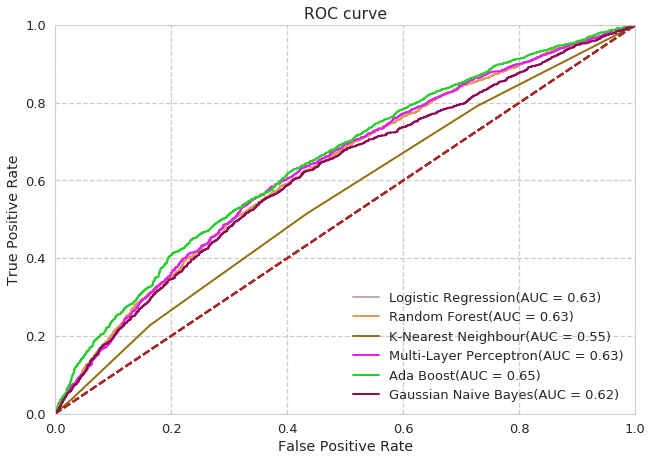

<Figure size 432x432 with 0 Axes>

In [65]:
plotAUC(y_test,lrPredictproba, 'Logistic Regression')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,knnPredictproba, 'K-Nearest Neighbour')
plotAUC(y_test,mlpPredictproba, 'Multi-Layer Perceptron')
plotAUC(y_test,adabPredictproba, 'Ada Boost')
plotAUC(y_test,gnbPredictproba, 'Gaussian Naive Bayes')



plt.show()
plt.figure(figsize=(6,6))
plt.show()

#### Observations from ROC 

    - The Ada Boost model gives the best results as compared to the other models.
    - Logistic, Random Forest and MLP models gives same results, with Gaussian Naive Bayes pretty close to them.
    - K-NN model gives the poor results.
    
#### Conclusion/Findings:
    - In a classification problem, we may decide to predict the class values directly.
    - Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to
    provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.
    - In our classification here, the main aim is to predict the probabilities of the loan defaults for the new loan
    applications. Hence, plotting a ROC curve gives a nice picture and also tells us which model is good for testing on new
    data. 
    - Here, Ada Boost algorithm has given better results as compared to other algorithms, although this model is not skilled
    model which needs to be, but if some more pre-processing, feature engineering, model validating ( evaluating different hyper parameters of model using grid search) is done then, the results should definitely be different.

### Compare Model Cross Val Scores Result

    - Plotting the mean cross-validation scores of all the models.

In [66]:
display(cross_val_mean_scores_comparisons)

{'Logistic ': 0.6056480112555791,
 'Random Forest ': 0.5737693139089679,
 'KNN': 0.5526682200411652,
 'MLP': 0.6011209914895672,
 'ADA Boost': 0.6146934746995925,
 'Gaussian Naive Bayes': 0.587661137160334}

C:\Users\pnkjs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


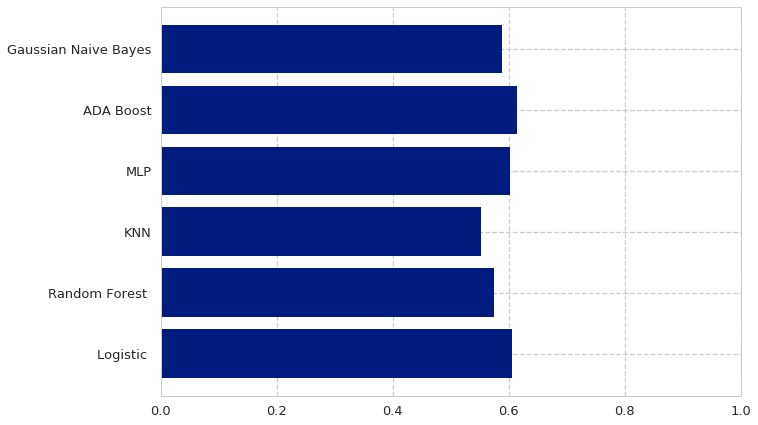

In [67]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(cross_val_mean_scores_comparisons)), list(cross_val_mean_scores_comparisons.values()), align='center')
_ = plt.yticks(range(len(cross_val_mean_scores_comparisons)), list(cross_val_mean_scores_comparisons.keys()))

#### Observations: 
    - Ada Boost model gives the better accuracy results as compared to other models.
    
    - Logistic Regression and MLP gives approximately same accuracies.
    
    - Guassian NB, Random Forest and KNN shows some poor accuracy scores with KNN the least.

#### Conclusion/Findings:
    - Along with predicting the probabilities of outcome, achieving the reasonable degree of accuracy is also required. 
    
    - cross-val-scores helps us getting the Accuracy scores for the models using Cross-Validation technique.
    
    - Cross validation is very much necessary to avoid overfitting of the data in short getting the generalized relationship.
    
    - Thus, from the above results Ada Boost model can work better in predicting on new data.

<font color =green
### Overall Observations:

    - It can be observed that, Ada-Boost model works better and gives some good results in the predictions.
    - The other models also performs well and could give us better results too, if the hyperparameters are changed or if the models are validated more properly.
    
    
### Overall Conclusion and Findings

    - The exercise above gives the rough idea of the approach that can be followed in predicting the loan defaults. However, it is not necessary to carry all the above steps. 
    - It can also be the case that, some of the steps above might not have been necessary at all and also could have cause decrease in the model performance.
    - So, it is very much necessary for any classification problem to perform as much as many experiments and by trying different techniques for predicting.
</font>

<font color =green >
<h2> Overall Observations </h2><br>
    - From the overall results above, it can be said that Ada Boost model works better as compared to other models for this data.<br><br>
    - Even the other models might give better results if some more validation and evaluation is done on them by using Grid Search ( i.e by experimenting them with different parameters)
    
<h2> Overall Conclusions-Insights-Findings </h2><br>
    - The exercise above gives the basic/rough idea of how one must approach this kind of problem.<br><br>
    
    - Although, the outcomes above are not that much good, which a predicting model should have, the approach that needs to be followed for this exercise is necessary.<br><br>
    
    - It can be the case that, the steps which I have followed might not be necessary. There might be some more steps that can play important role in the model predictions. Therefore, it is very much important to try and experiment different things.
    </font>